In [145]:
# clone git

In [146]:
!rm -rf ../data/external
!rm -rf ../nlp_utils_repo

In [147]:
!git clone https://github.com/OnlpLab/Hebrew-Sentiment-Data.git ../data/external/OnlpLab
!git clone https://github.com/wzwzeyal/nlp_utils_repo.git ./nlp_utils_repo

Cloning into '../data/external/OnlpLab'...
fatal: unable to access 'https://github.com/OnlpLab/Hebrew-Sentiment-Data.git/': Could not resolve host: github.com
fatal: destination path './nlp_utils_repo' already exists and is not an empty directory.


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nlp_utils_repo.nlp_utils import clean_data


In [149]:
ROOT_PATH = '../data/external/OnlpLab/Sentiment_Data'
FIG_SIZE = (20, 15)


In [150]:
def get_onlp_data(token_or_morph, data_type):
  return pd.read_csv(f'{ROOT_PATH}/{token_or_morph}/{data_type}.tsv', sep='\t')

In [151]:
train_token_df = get_onlp_data('token', 'train')
val_token_df = get_onlp_data('token', 'dev')

train_morph_df = get_onlp_data('morph', 'train')
val_morph_df = get_onlp_data('morph', 'dev')

FileNotFoundError: [Errno 2] No such file or directory: '../data/external/OnlpLab/Sentiment_Data/token/train.tsv'

In [ ]:
datasets = [
  {"name": "train_token_df", "df": train_token_df},
  {"name": "val_token_df", "df": val_token_df},
  {"name": "train_morph_df", "df": train_morph_df},
  {"name": "val_morph_df", "df": val_morph_df},
]

In [ ]:
codes = {0 : 'pos', 1: 'neg', 2: 'nut'}
palette = {'pos': 'green', 'neg': 'red', 'nut': 'gray'}


In [ ]:
for dataset in datasets:
  df = dataset['df']
  clean_data(df, 'comment', 'comment_clean')
  df['sentiment'] = df.label.map(codes)
  df['comment_clean_len'] = df.comment_clean.str.len()

In [ ]:
train_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
695,בהצלחה כבוד הנשיא מעפולה,0,בהצלחה כבוד הנשיא מעפולה,pos,24
379,"איזה כיף שיש לנו נשיא שכזה , מלא אהבה לזולת (...",0,איזה כיף שיש לנו נשיא שכזה מלא אהבה לזולת ולבע...,pos,111
5029,"כבוד הנשיא ריבלין היקר , תמיד אני אוהבת את דע...",0,כבוד הנשיא ריבלין היקר תמיד אני אוהבת את דעותי...,pos,344
5832,הלב נקרע..איזה ילד מתוק כואב הלב ! שהשם ישלח כ...,0,הלב נקרעאיזה ילד מתוק כואב הלב שהשם ישלח כוחות...,pos,149
3906,היי ... כבוד הנשיא ראובן ריבלין כל העם מטף ועד...,1,היי כבוד הנשיא ראובן ריבלין כל העם מטף ועד זקן...,neg,295


In [ ]:
val_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
657,אני גאה שיש לנו נשיא כמוך פשוט לבוא להלוויה הי...,0,אני גאה שיש לנו נשיא כמוך פשוט לבוא להלוויה הי...,pos,92
241,ילד בן ארבע לא הספיק אפילו חצי מהחיים שלו עצוב...,0,ילד בן ארבע לא הספיק אפילו חצי מהחיים שלו עצוב...,pos,55
625,"כבוד הנשיא הנבחר , מאז ימי הנשיא יצחק נבון , ...",0,כבוד הנשיא הנבחר מאז ימי הנשיא יצחק נבון לא הי...,pos,122
664,"לרובי ריבלין היקר , רציתי לשתף אותך על היום ה...",0,לרובי ריבלין היקר רציתי לשתף אותך על היום המאו...,pos,268
49,יחי יחי יחי נשיא מדינת ישראל .,0,יחי יחי יחי נשיא מדינת ישראל,pos,28


In [ ]:
train_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
287,"ה חלום של ה נשיא הוא לא קטן , , , ה חלום ה קט...",1,חלום של נשיא הוא לא קטן חלום קטן הוא שחקנים יכ...,neg,104
1195,חבורת טיפשים ו עיוורים שוכחים מהר מה ה ערבים ע...,1,חבורת טיפשים עיוורים שוכחים מהר מה ערבים עושים...,neg,184
2288,כל ה כבוד ! גם ל אני הא לבוא אבל אתה מכיר את א...,0,כל כבוד גם אני הא לבוא אבל אתה מכיר את אני אתה...,pos,67
1307,מזל טוב נשיאנו ה אהוב !,0,מזל טוב נשיאנו אהוב,pos,19
1939,זה מה ש קורא היום ש מפורסם ניסה את היא ללקק או...,1,זה מה קורא היום מפורסם ניסה את היא ללקק או להח...,neg,140


In [ ]:
val_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
317,מ ה כרותי רבת ה שנים את אתה אני יודעת על אהבתך זו,0,כרותי רבת שנים את אתה אני יודעת על אהבתך זו,pos,43
223,שם מקסים נתת ל ביתך .... חחחח,0,שם מקסים נתת ביתך חח,pos,20
536,טדי רוזוולט טבע את ה מונח bully pulpit לתאר כ...,0,טדי רוזוולט טבע את מונח לתאר כוחו חובתו של מנה...,pos,77
163,"כל ה כבוד , איש יקר ! המון הצלחה , ב תפקידך ה...",0,כל כבוד איש יקר המון הצלחה תפקידך חדש כמובן גם...,pos,86
701,עוד שבוע עבר ב ה דרך ל ה הכתרתך ה רשמית ל נשיא...,0,עוד שבוע עבר דרך הכתרתך רשמית נשיא מדינה,pos,40


In [ ]:
datasets[0]['df']

,comment,label,comment_clean,sentiment,comment_clean_len
0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...,0,ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,pos,44
1,כל הכבוד והמון בהצלחה,0,כל הכבוד והמון בהצלחה,pos,21
2,"תל חי , רובי . בכל העצב הזה היית קרן אור של ת...",0,תל חי רובי בכל העצב הזה היית קרן אור של תקוה א...,pos,63
3,נקי כפיים ובר לבב בהצלחה לך ולנו .,0,נקי כפיים ובר לבב בהצלחה לך ולנו,pos,32
4,רובי חג שמח והצלחה בבחירות לנשיאות .,0,רובי חג שמח והצלחה בבחירות לנשיאות,pos,34
...,...,...,...,...,...
5921,כל הכבוד לנשיא שלנו !,0,כל הכבוד לנשיא שלנו,pos,19
5922,לשבעת המגייבים הקודמים : דמוקרטיה אין פירושה ...,1,לשבעת המגייבים הקודמים דמוקרטיה אין פירושה למח...,neg,386
5923,ישששששששששששששששש בשעה טובה איש מדהים איש אמת ...,0,ישש בשעה טובה איש מדהים איש אמת עם ישראל בשעתו...,pos,53
5924,יחי יחי נשיא מדינת ישראל רובי רבלין.אנא מימך א...,0,יחי יחי נשיא מדינת ישראל רובי רבליןאנא מימך אל...,pos,208


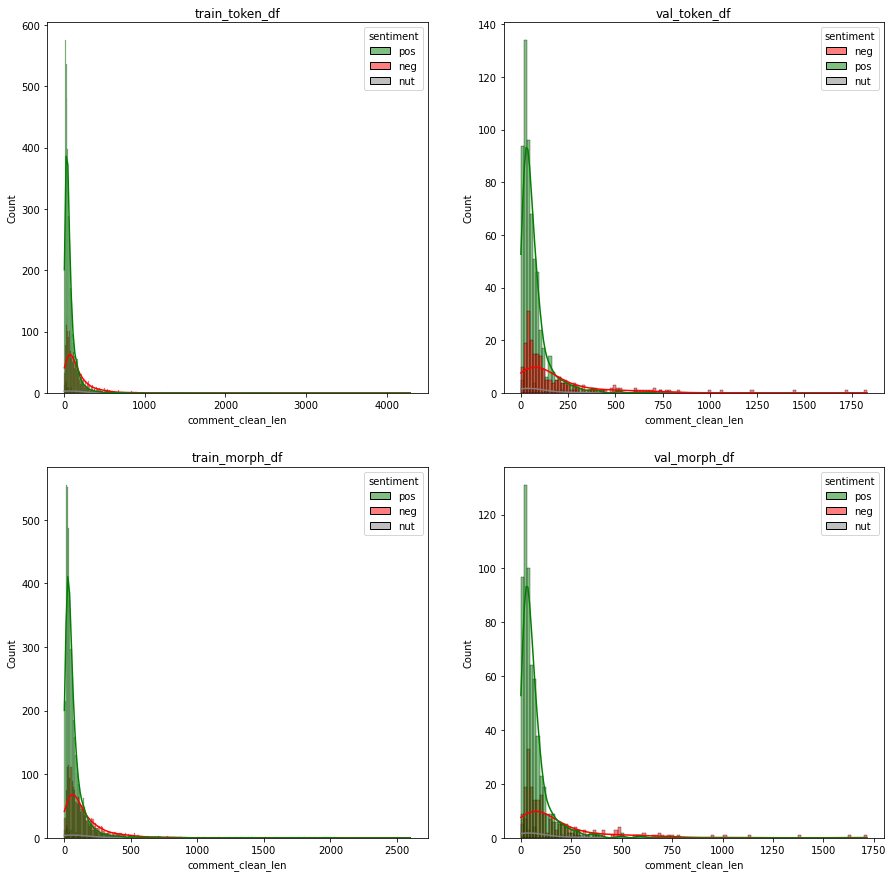

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))#, gridspec_kw={'hspace': 1.2, 'wspace': 1.5})

for ax, dataset in zip(axes.flatten(), datasets):
  sns.histplot(dataset['df'], x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()


#for ax in axs:


In [154]:
MAX_LEN=512

# for dataset in datasets:
#   df = dataset['df']
#   df = df[df.comment_clean_len < MAX_LEN]

for idx in range(len(datasets)):
  df = datasets[idx]['df']
  datasets[idx]['df'] = df[df.comment_clean_len < MAX_LEN]#  & df.comment_clean_len > 0]

for idx in range(len(datasets)):
  df = datasets[idx]['df']
  datasets[idx]['df'] = df[df.comment_clean_len > 0]#  & df.comment_clean_len > 0]

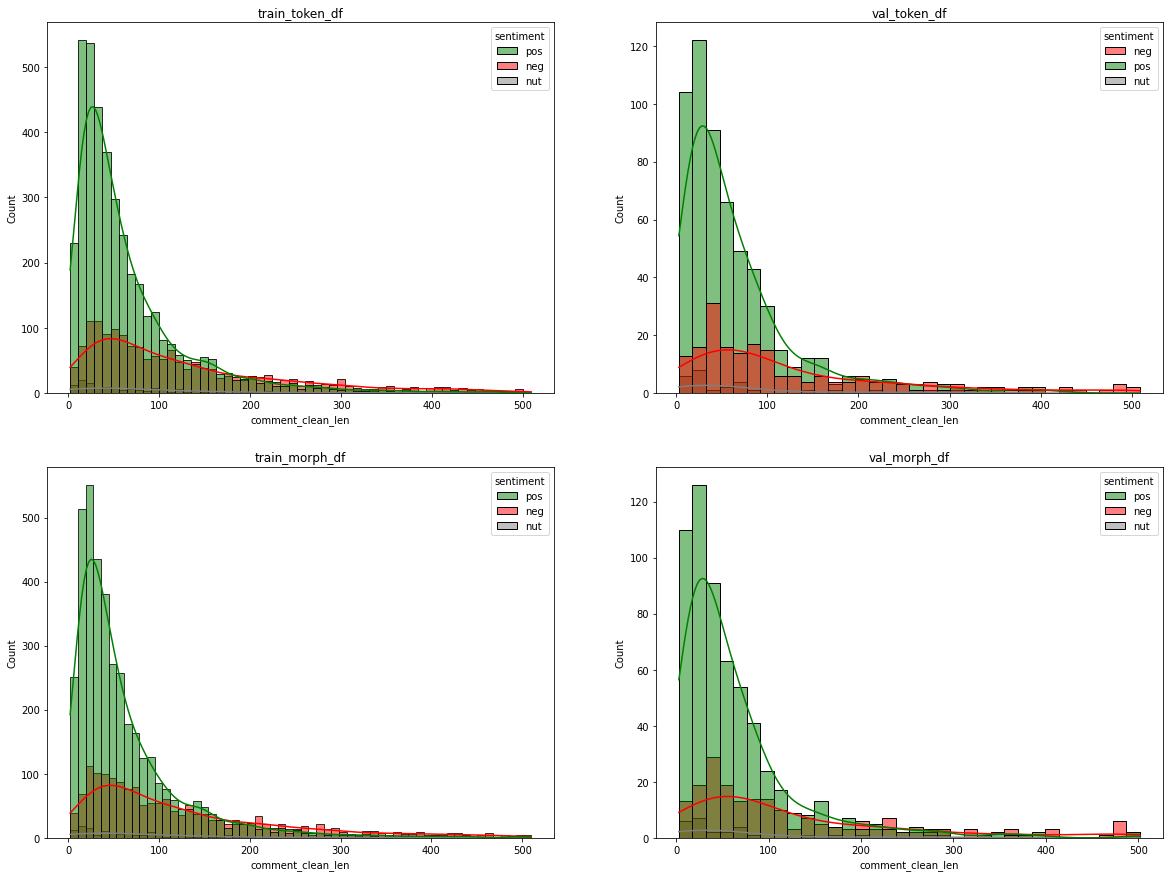

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=FIG_SIZE)

for ax, dataset in zip(axes.flatten(), datasets):
  df = dataset['df']
  sns.histplot(df, x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()

In [158]:
SENTIMENT_DATA = '../data/for_sentiment'

!mkdir SENTIMENT_DATA

for dataset in datasets:
  name = dataset['name']
  print(dataset['df'].describe())
  dataset['df'].to_csv(
      f'{SENTIMENT_DATA}/{name}.gz',
       compression = 'gzip')

mkdir: cannot create directory ‘SENTIMENT_DATA’: File exists
             label  comment_clean_len
count  5783.000000        5783.000000
mean      0.338233          84.184506
std       0.526111          87.336767
min       0.000000           2.000000
25%       0.000000          27.000000
50%       0.000000          53.000000
75%       1.000000         107.000000
max       2.000000         509.000000
            label  comment_clean_len
count  818.000000         818.000000
mean     0.304401          79.838631
std      0.527348          85.813086
min      0.000000           3.000000
25%      0.000000          25.000000
50%      0.000000          50.000000
75%      1.000000          95.000000
max      2.000000         509.000000
             label  comment_clean_len
count  5809.000000        5809.000000
mean      0.339129          81.812877
std       0.526488          86.480339
min       0.000000           2.000000
25%       0.000000          26.000000
50%       0.000000          51.00000

In [157]:
train_token_df.describe()

,label,comment_clean_len
count,5926.000000,5926.000000
mean,0.349983,103.576612
std,0.532193,183.745627
min,0.000000,0.000000
25%,0.000000,27.000000
50%,0.000000,54.000000
75%,1.000000,114.000000
max,2.000000,4293.000000
